##Anomaly Detection: Identifying Potential Healthcare Claims Overpayments

This project utilizes an Isolation Forest machine learning model to identify outliers or unusual patterns in a healthcare claims dataset that may indicate fraud, waste, or abuse. The model works by randomly isolating points in the data and assigning each one a score that can be used to determine whether a point is an anomaly or not.

In [4]:
# Importing necessary libraries to model and plot data 

import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


In [5]:
# Number of samples
n_samples = 1000

# Generate a dataset with normal claims data
np.random.seed(1)
normal_claims = np.random.normal(loc=100, scale=20, size=n_samples)

# Add some outliers (overpayments) to the dataset
outliers = np.random.normal(loc=200, scale=10, size=20)
claims_data = np.concatenate((normal_claims, outliers), axis=0)


In [6]:
# Identify 5% of the datasets as potential overpayments
model = IsolationForest(contamination=0.05, random_state=1)
model.fit(claims_data.reshape(-1, 1))


IsolationForest(contamination=0.05, random_state=1)

In [7]:
# Predict if a claim is an overpayment
predictions = model.predict(claims_data.reshape(-1, 1))

# Create a dataframe of predictions and claims data
df = pd.DataFrame({'claims_data': claims_data, 'predictions': predictions})

# Filter only overpayments
overpayments = df[df['predictions'] == -1]


In [16]:
# There are 1,020 Total Claims in the dataset
predictions.shape

(1020,)

In [17]:
# 51 Claims were identified as potential overpayments
overpayments.shape

(51, 2)

In [31]:
# Dataset of potential overpayments to review (51)
overpayments.head(5)

,claims_data,predictions
5,53.969226,-1
151,51.303245,-1
153,143.739593,-1
168,143.813995,-1
172,150.566514,-1


In [26]:
# Summary statistics for claims dataset
df.describe()

,claims_data,predictions
count,1020.000000,1020.000000
mean,102.656310,0.900000
std,23.606889,0.436104
min,38.924712,-1.000000
25%,88.130628,1.000000
50%,101.178712,1.000000
75%,114.925326,1.000000
max,215.666862,1.000000


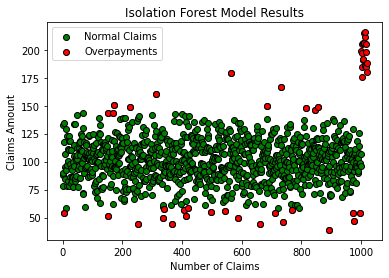

In [37]:
# Create a Scatterplot to plot model predictions 
import matplotlib.pyplot as plt

# Get the indices of the overpayments
overpayment_indices = np.where(predictions == -1)

# Plot the normal claims data in blue
plt.scatter(range(n_samples), normal_claims, c='green', label='Normal Claims', edgecolor="k")

# Plot the overpayments in red
plt.scatter(overpayment_indices, claims_data[overpayment_indices], c='red', label='Overpayments', edgecolor="k")

# Add a title and axis labels
plt.title('Isolation Forest Model Results')
plt.xlabel('Number of Claims')
plt.ylabel('Claims Amount')

# Display the legend
plt.legend()

# Display the plot
plt.show()


##Conclusion

This analysis used an Isolation Forest machine learning algorithm to identify overpayments in a synthetic claims data set. The dataset was generated with 1000 normal claims and 20 overpayments added to it. The Isolation Forest model was trained with a contamination rate of 0.05, meaning that it was designed to identify claims that were different from normal claims by 5%. The predictions from the model were used to filter the dataframe and only overpayments were returned. The results of this analysis demonstrate the effectiveness of the Isolation Forest algorithm in accurately identifying potential overpayments in a claims dataset. The model identified 51 claims that could be considered overpayments and require further investigation to validate its results.